# <span style="color:#6C3483"/>Cardio Good Fitness Case Study

### Background
Cardio Good Fitness is a fitness product retail store which sells variety of treadmills. The fitness market is increasing. The customers prefer to purchase the fitness equipments for their home use.

### Objective
Identify customer profile for treadmill products and generate recommendations

### Key Questions
1. What are the characterstics of customers of each product?
2. Who are the target customers for each product?
3. What the additional insights for the business?

### Data Desciption
<table>
  <thead>
    <tr>
      <th>No.</th>
      <th>Data</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>Product </td>
      <td>The Model number for the treadmill</td>
    </tr>
    <tr>
      <td>2</td>
      <td>Age</td>
      <td>Age of the customers in years</td>
    </tr>
     <tr>
      <td>3</td>
      <td>Gender</td>
      <td>Gender of customer</td>
    </tr>
    <tr>
      <td>4</td>
      <td>Education</td>
      <td>Education of the customers in years</td>
    </tr>
    <tr>
      <td>5</td>
      <td>Marital Status</td>
      <td>Marital Status of the Customer Single or Partnered</td>
    </tr>
      <tr>
      <td>6</td>
      <td>Usage</td>
      <td>Average number of times the customer wants to use the treadmill every weeks</td>
    </tr>
     <tr>
      <td>7</td>
      <td>Fitness</td>
      <td>Self rated fitness score of the customer (5 - very fit, 1 - very unfit)</td>
    </tr>
      <tr>
      <td>8</td>
      <td>Income</td>
      <td>Income of the customer</td>
    </tr>
      <tr>
      <td>9</td>
      <td>Miles</td>
      <td>Miles customer expects to run</td>
    </tr>
  </tbody>
</table>

## <span style="color:#6C3483"/>Exploratory Data Analysis

### Import the necessary libraries and packages

In [1]:
# import warnings library to hide warning and deprecation messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data handling and numeric processing libraries
import pandas as pd
import numpy as np

In [3]:
# import visualizations and chart libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# command to display plots in the notebook
%matplotlib inline

In [5]:
# set styling options
sns.set_style('darkgrid')

### Load the dataset

In [6]:
data = pd.read_csv("CardioGoodFitness.csv") #importing data from the local folder

In [7]:
# verify the data load - view first few rows
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [8]:
# view last few rows
data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


- Product is the alpha-numeric product code
- Gender and Martial Status are categorical variables
- Age, Education, Usage, Income and Miles are numerical
- Fitness is ordinal data, 1 - very unfit and 5 - very fit. Treating it as category will yield more insights on customer than numerical data.

### Understanding the data

In [9]:
# find rows and columns in the data
data.shape

(180, 9)

The dataset has 180 observations and 9 fields

In [10]:
# get info on the data types of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


All the fields have all obeservations. No missing fields. Let's confirm that.

In [11]:
# find if there are any missing values
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

- There are 180 observations in the dataset
- All the columns have 180 observations, no missing values
- Product, Gender and Marital Status should be categorical variables
- Fitness is ordinal data. Treating it as a categorical data

In [12]:
# convert object variables into categorical variables
data['Product'] = data.Product.astype('category')
data['Gender'] = data.Gender.astype('category')
data['MaritalStatus'] = data.MaritalStatus.astype('category')
data['Fitness'] = data.Fitness.astype('category')

### Summarizing the data

In [13]:
# get summary stats on the numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


- Age ranges between 18 and 50. As mean is greater than median it indicates the age is right skewed
- Education the median value and 75th percentile are equal. 
- Miles, the mean is higher than median indicating right skewness.

In [14]:
# get summary stats on the non-numerical variables
data.describe(exclude="number").T

,count,unique,top,freq
Product,180,3,TM195,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107
Fitness,180,5,3,97


- the dataset includes observations for 3 Products
- the Gender has 2 values with 57% responses from Males. Good number of observations for Female and Male
- 60% of customers have a partner

### Univariate Analysis

Analysis on the numerical variables

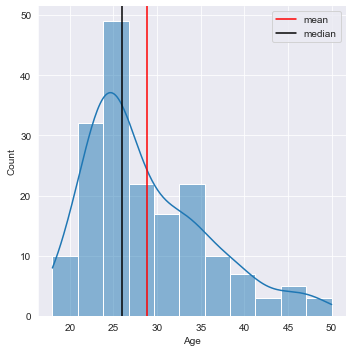

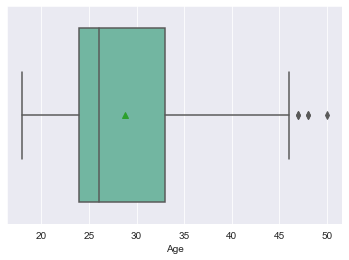

In [15]:
# Analysis on age of the customer 
variable = data['Age']

# Create histogram
sns.displot(variable,kde=True)

# Display mean and median in the histogram
mean = variable.mean()
median = variable.median()
plt.axvline(mean, color='red', linestyle='-',label='mean') 
plt.axvline(median, color='black', linestyle='-',label='median')
plt.legend()
plt.show()

# Creating boxplot
sns.boxplot(variable,showmeans=True,palette="Set2")
plt.show()

- All the customers are between 18-50 age
- 75% of the customers are below 33 years
- Age data is slightly right skewed
- There are few outliers age between 46-50 years

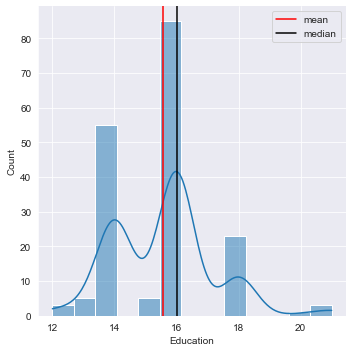

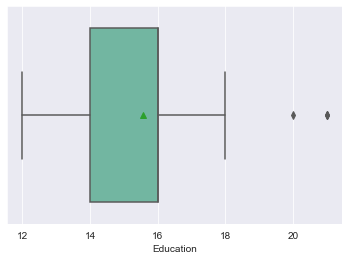

In [16]:
# Analysis on education of the customer 
variable = data['Education']

# Create histogram
sns.displot(variable,kde=True)

# Display mean and median in the histogram
mean = variable.mean()
median = variable.median()
plt.axvline(mean, color='red', linestyle='-',label='mean') 
plt.axvline(median, color='black', linestyle='-',label='median')
plt.legend()
plt.show()

# Creating boxplot
sns.boxplot(variable,showmeans=True,palette="Set2")
plt.show()

- More than 80 customers have 16 years of education
- Around 55 customers have 14 years of education

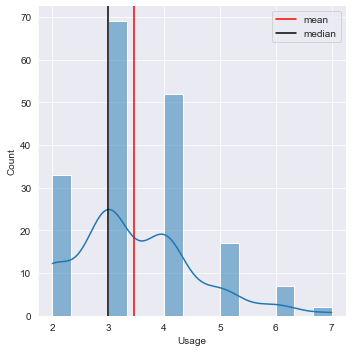

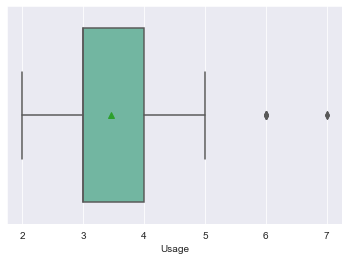

In [17]:
# Analysis on usage of the customer 
variable = data['Usage']

# Create histogram
sns.displot(variable,kde=True)

# Display mean and median in the histogram
mean = variable.mean()
median = variable.median()
plt.axvline(mean, color='red', linestyle='-',label='mean') 
plt.axvline(median, color='black', linestyle='-',label='median')
plt.legend()
plt.show()

# Creating boxplot
sns.boxplot(variable,showmeans=True,palette="Set2")
plt.show()

- Using treadmill 3-4 times a week is the most popular choice

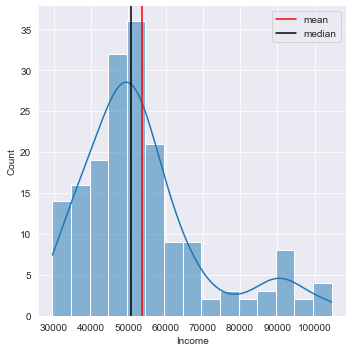

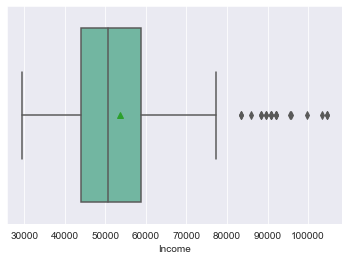

In [18]:
# Analysis on income of the customer 
variable = data['Income']

# Create histogram
sns.displot(variable,kde=True)

# Display mean and median in the histogram
mean = variable.mean()
median = variable.median()
plt.axvline(mean, color='red', linestyle='-',label='mean') 
plt.axvline(median, color='black', linestyle='-',label='median')
plt.legend()
plt.show()

# Creating boxplot
sns.boxplot(variable,showmeans=True,palette="Set2")
plt.show()

- Customer income ranges between 30,000-100,000
- The median customer income is little above 50,0000
- Lot of outliers fall outside higher whisker

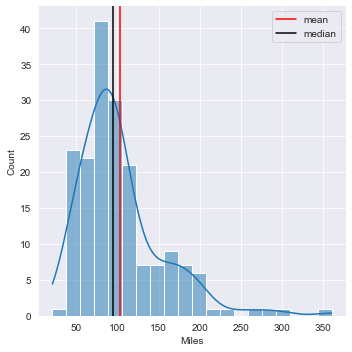

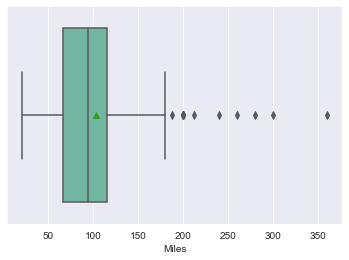

In [19]:
# Analysis on income of the customer 
variable = data['Miles']

# Create histogram
sns.displot(variable,kde=True)

# Display mean and median in the histogram
mean = variable.mean()
median = variable.median()
plt.axvline(mean, color='red', linestyle='-',label='mean') 
plt.axvline(median, color='black', linestyle='-',label='median')
plt.legend()
plt.show()

# Creating boxplot
sns.boxplot(variable,showmeans=True,palette="Set2")
plt.show()

- Slight right skew in the data
- Mean miles are 110

Analysis on the categorical variables

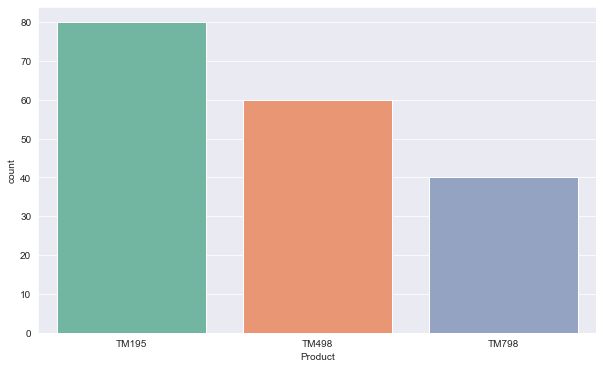

In [20]:
# Analysis on products
plt.figure(figsize=(10,6))
category = data['Product']
sns.countplot(category,palette="Set2")
plt.show()

- Data set contains 3 products
- TM195 is most popular product with 80 customers followed by TM498 which has 60 customers

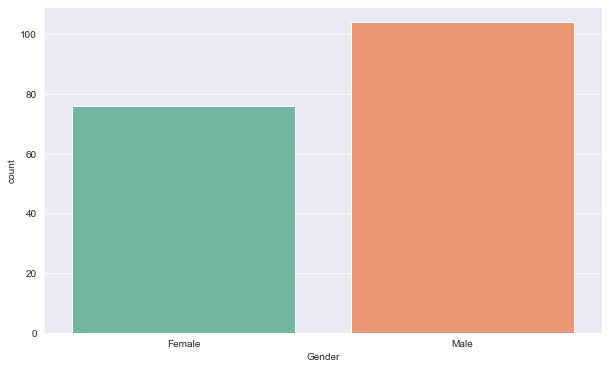

In [21]:
# Analysis on customer genders
plt.figure(figsize=(10,6))
category = data['Gender']
sns.countplot(category,palette="Set2")
plt.show()

- Gender has two values Females and Males
- Overall, more Male customers than Female customers

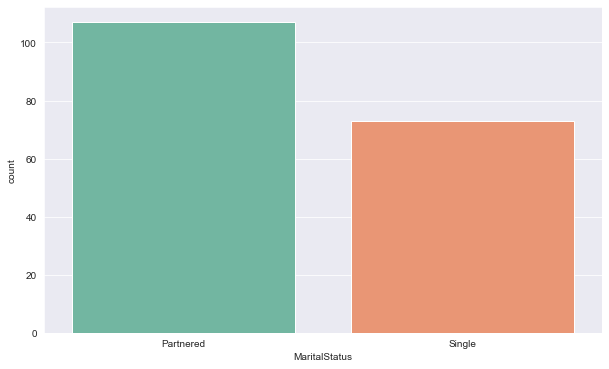

In [22]:
# Analysis on customer Marital Status
plt.figure(figsize=(10,6))
category = data['MaritalStatus']
sns.countplot(category,palette="Set2")
plt.show()

- Both Partnered and Singles are customers of Cardio Good Fitness
- There are more partnered customers as compared to singles

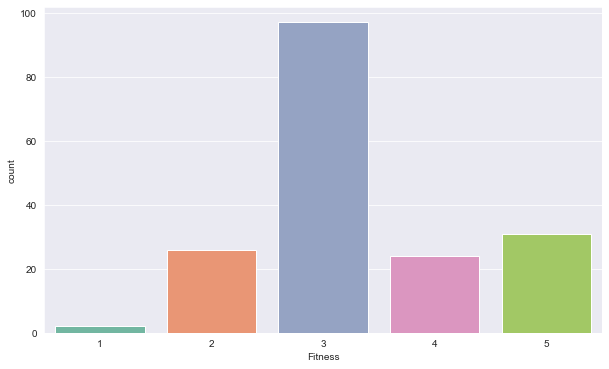

In [23]:
# Analysis on Fitness status
plt.figure(figsize=(10,6))
category = data['Fitness']
sns.countplot(category,palette="Set2")
plt.show()

- Most of the customers have fitness level 3
- Few customers have fitness level 5
- There are barely any customers who have fitness level unfit 1

### Multivariate Analysis

Analyzing relations between categorical variables

In [24]:
# Checking products preference by Gender
pd.crosstab(index=data["Product"],columns=data["Gender"])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


- TM195 has same number of Female and Male customers
- TM498 have slightly higher number of Male customers
- TM798 is more popular with Male customers as compared to Female customers

In [25]:
# Checking product preference based on Marital Status
pd.crosstab(index=data["Product"],columns=data["MaritalStatus"])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


- All the three products have higher Partnered customers than Singles

In [26]:
# Checking product preference based on their Fitness level
pd.crosstab(index=data["Product"],columns=data["Fitness"])

Fitness,1,2,3,4,5
Product,,,,,
TM195,1,14,54,9,2
TM498,1,12,39,8,0
TM798,0,0,4,7,29


- Customers with all Fitness level use TM195
- TM798 is most popular for customers with Fitness level 5

Analyzing relations between various numerical variables

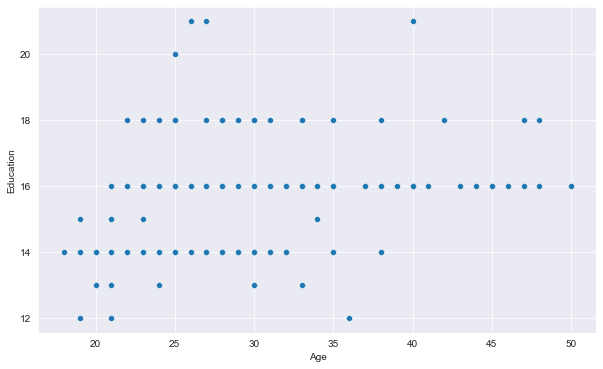

In [27]:
# Design scatter plot for variables Age and Education
plt.figure(figsize=(10,6))
var1 = data['Age']
var2 = data['Education']
sns.scatterplot(x=var1, y=var2)
plt.show()

- Higher aged customers have higher education

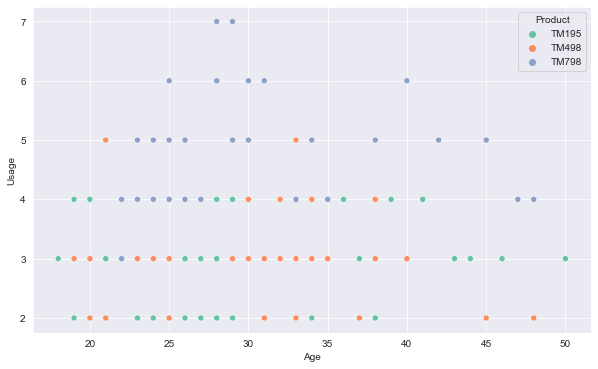

In [28]:
# Design scatter plot for variables Age and Usage by Product
plt.figure(figsize=(10,6))
var1 = data['Age']
var2 = data['Usage']
sns.scatterplot(x=var1, y=var2,hue=data['Product'],palette="Set2")
plt.show()

- TM798 is mostly used by customers whose usage is 4 or higher
- TM195 and TM498 is used by customers whose usage is 2 and 3
- There is no product preference based on customer age

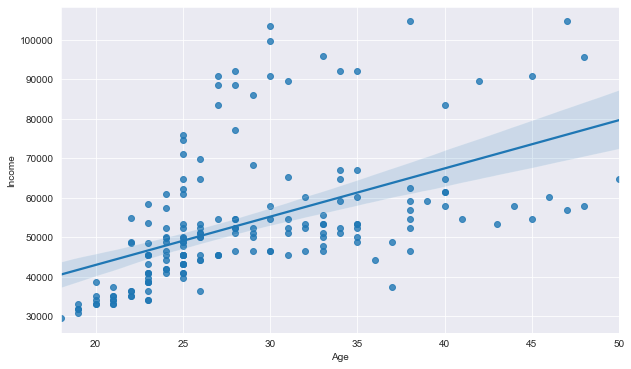

In [29]:
# Regression plot analysis between Age and Income
plt.figure(figsize=(10,6))
var1 = data['Age']
var2 = data['Income']
sns.regplot(x=var1, y=var2)
plt.show()

- As expected, income increases with age
- There is linear relationship between age and income

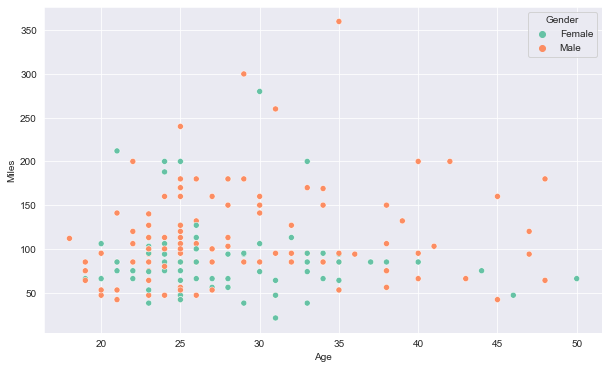

In [30]:
# Checking with Age & Gender have an impact on number of miles
plt.figure(figsize=(10,6))
var1 = data['Age']
var2 = data['Miles']
sns.scatterplot(x=var1, y=var2,hue=data['Gender'],palette="Set2")
plt.show()

- Most of the female customers miles are lower than 100

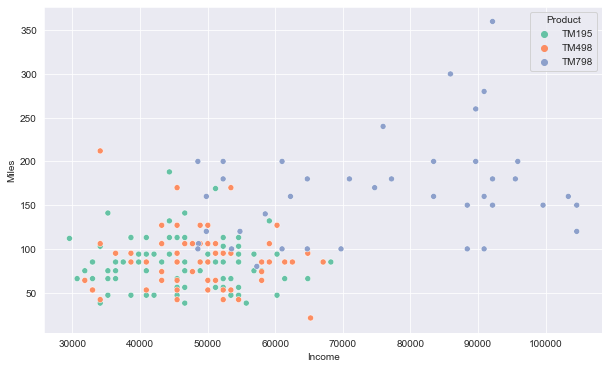

In [31]:
# Customer product trends based on income and miles
plt.figure(figsize=(10,6))
var1 = data['Income']
var2 = data['Miles']
sns.scatterplot(x=var1, y=var2,hue=data['Product'],palette="Set2")
plt.show()

- TM798 is preferred by customer with higher income and higher miles target
- TM195 and TM498 has mixed use based on income and miles

In [32]:
# Determining correlation between numerical variables
data.corr() # correlation function

,Age,Education,Usage,Income,Miles
Age,1.000000,0.280496,0.015064,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.519537,0.759130
Income,0.513414,0.625827,0.519537,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.543473,1.000000


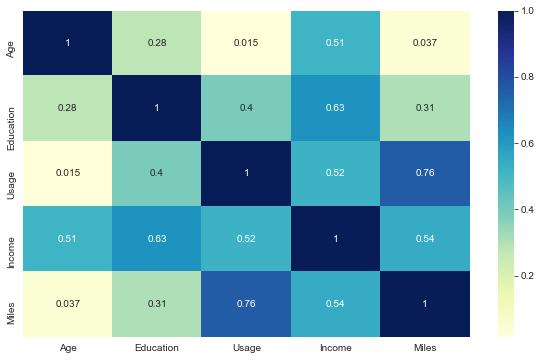

In [33]:
# Let's plot correlations heatmap for better understanding
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

- Positively high relationship between usage and miles. The more miles they have to cover, they use the product more
- Significant relation between Usage and Income
- As we determined earlier there is high relationship between Income and Age
- There is also relationship between Income and Education. Higher education usually yields higher income

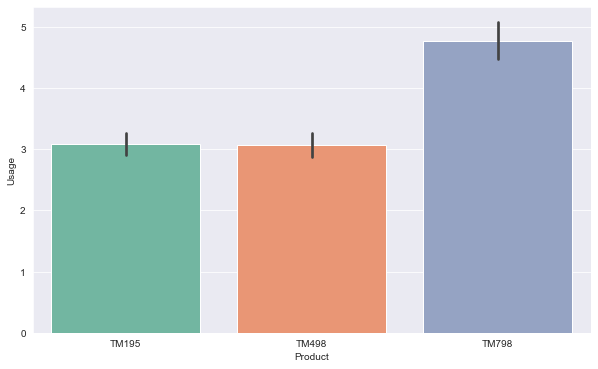

In [34]:
# check product usage
var1 = data['Usage']
cat1 = data['Product']
plt.figure(figsize=(10,6))           
# design bar plot to check
sns.barplot(cat1,var1,orient="v",palette="Set2")
plt.show()

- Customers prefer TM798 for higher usage
- The usage doesn't vary much for product TM195 and TM498

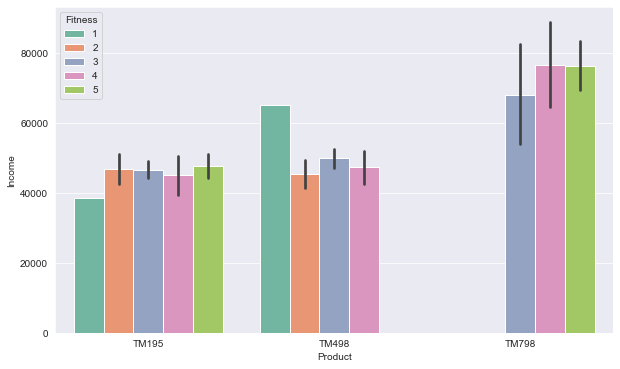

In [35]:
# check which products customers prefer based on income and fitness
var1 = data['Income']
cat1 = data['Product']
plt.figure(figsize=(10,6))           
# create a bar plot using the variables
sns.barplot(cat1,var1,hue=data['Fitness'],palette="Set2")
plt.show()

- TM195 used by all fitness levels and income below 50,000
- TM798 used by 3-5 fitness levels and income above 70,000

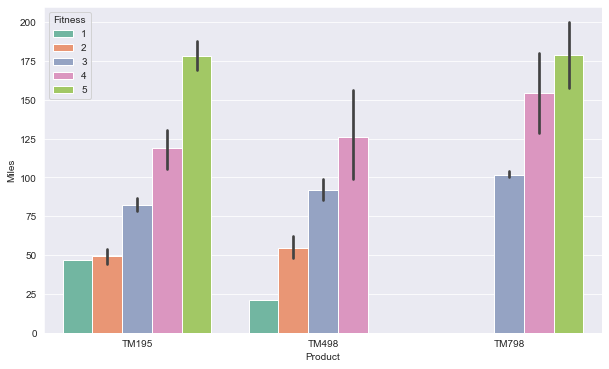

In [36]:
# product selection based pn fitness and miles
var1 = data['Miles']
cat1 = data['Product']
plt.figure(figsize=(10,6))  
# displaying bar plot
sns.barplot(cat1,var1,hue=data['Fitness'],palette="Set2")
plt.show()

- TM195 and TM798 are both preferred by higher miles

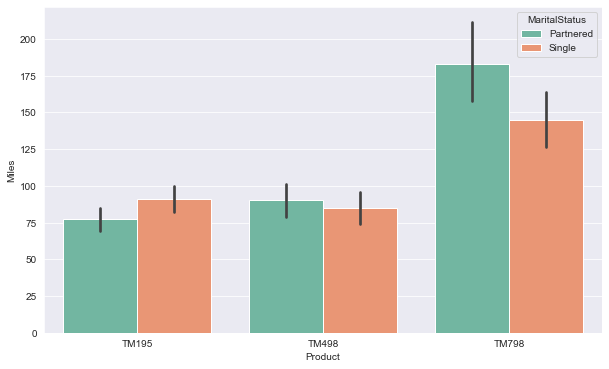

In [37]:
# product by miles and marital status
var1 = data['Miles']
cat1 = data['Product']
plt.figure(figsize=(10,6))           
sns.barplot(cat1,var1,hue=data['MaritalStatus'],palette="Set2")
plt.show()

- TM195 has higher singles users miles lower than 100
- TM7989 has higher partnered customers

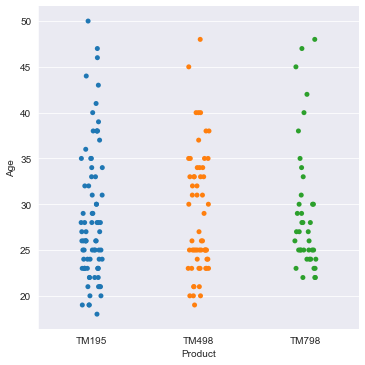

In [38]:
# Perform additional analysis on each product type to find insights on TM498
# categorical analysis Product and Age
sns.catplot(x="Product", y="Age", data=data)
plt.show()

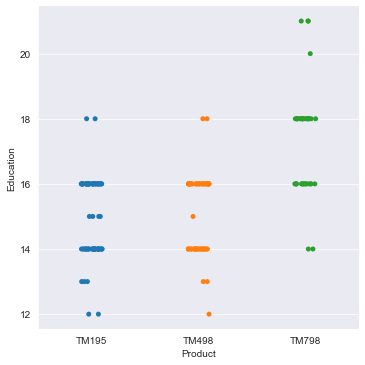

In [39]:
# categorical analysis Product and Education
sns.catplot(x="Product", y="Education", data=data)
plt.show()

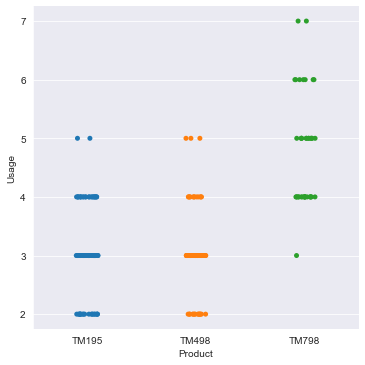

In [40]:
# categorical analysis Product and Usage
sns.catplot(x="Product", y="Usage", data=data)
plt.show()

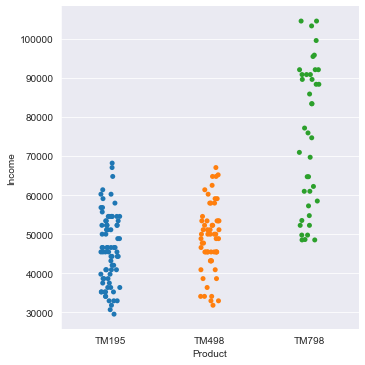

In [41]:
# categorical analysis Product and Income
sns.catplot(x="Product", y="Income", data=data)
plt.show()

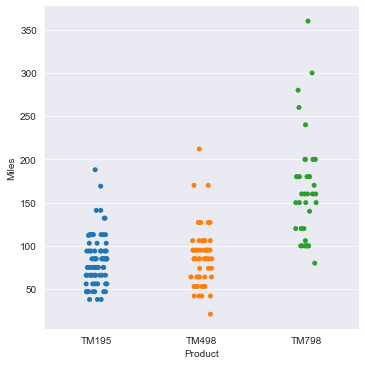

In [42]:
# categorical analysis Product and Education
sns.catplot(x="Product", y="Miles", data=data)
plt.show()

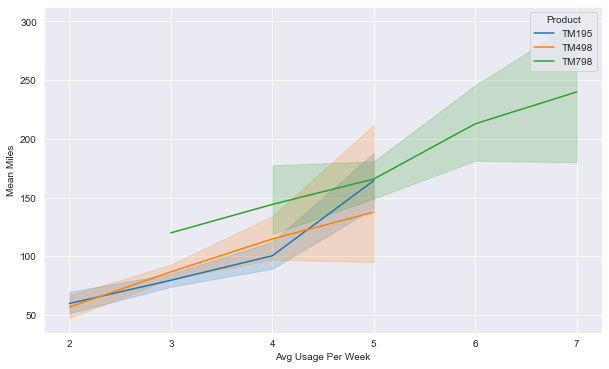

In [43]:
# Looking at usage and miles together for each product
# Create line plot to understand the relation
plt.figure(figsize=(10,6))
sns.lineplot(x="Usage", y="Miles", ci=95, data=data,hue='Product')
plt.ylabel('Mean Miles')
plt.xlabel('Avg Usage Per Week')
plt.show()

- From the above analysis we can see there is overlap between TM195 and TM498 customers
- TM195 and TM498 the products cater to customers with similar Age, Education, and Income groups
- TM498 product customers Usage is 2-5 times per week and 50-200 miles target

### Pandas Profiling

Adding pandas profiling analysis to get an overview

In [44]:
from pandas_profiling import ProfileReport
profile_report = ProfileReport(data,title="Pandas Profiling Report")
profile_report

## <span style="color:#6C3483"/>Conclusion and Recommendations

### Conclusion

We looked at the 180 customers for the treadmill products for Cardio Good Fitness. The data set contains three types of treadmill products. The main features of the data set are Miles and Usage. The customer Age, Income, Fitness, and Maritial Status have effects on the purchasing behavior.

We conclude the following:

- Cardio Good Fitness caters to a variety of customer base ranging in age, gender, income, education, marital status, and fitness level
- TM195 and TM498 products are more popular products
- TM798 is a higher-end product preferred by customers with higher fitness, usage, and miles 
- All the products have good distribution for customer gender. However, there slightly more partnered customers than singles
- As expected, for customers income increases with age and education
- TM195 and TM498 have an overlap of customers, the products cater to customers with similar age, education, and income groups
- The relationship between usage and miles is evident, more the miles higher is the usage
- 75% of customer are 35 or below in age

### Recommendations

- Most of the customers have an average usage 3-4 times per week and 75% age group below 35 years. Continue to market to these segments with TM195 and TM498 products
- The TM798 is an elite product offered to higher usage and higher fitness level customers
- There is a new opportunity to market to customers who have been using TM195 for higher usage and miles to upgrade to the TM798
- TM195 and TM498 are good choices to offer to Female customers
- For TM195 and TM498, there is a lesser influence from income and miles, products good to market to the customers who looking for first purchase
- Gather more data about TM498 customers and preferences to segment customers

### Further Analysis

- Deeper analysis on the customers for product TM498
- Analysis based on business goals to sell more higher number or higher value products